In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [11]:
word_index = keras.datasets.imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
reversed_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
def decode_review(text) -> str:
    return ' '.join([reversed_word_index.get(i-3, "") for i in text])

decode_review(train_data[0])

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [14]:
X_train=np.vectorize(decode_review)(train_data)
X_test=np.vectorize(decode_review)(test_data)

In [15]:
X_test,X_val,y_test,y_val=train_test_split(X_test,test_labels,test_size=0.5,random_state=42)
Y_train=train_labels
Y_test=y_test

In [16]:
# vectorizar

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
X_val = vectorizer.transform(X_val).toarray()


pd.DataFrame(X_train, columns=[vectorizer.get_feature_names_out()])

,00,000,10,100,1000,101,11,12,13,13th,...,zhang,zizek,zodiac,zombi,zombie,zombies,zone,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
model=keras.Sequential()
model.add(keras.layers.Dense(16,activation='relu',input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy','Precision'],
)

history=model.fit(X_train,Y_train,epochs=30,validation_data=(X_val,y_val))



2023-03-20 21:43:37.014378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 21:43:37.160205: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1954200000 exceeds 10% of free system memory.


Epoch 1/30
765/782 [============================>.] - ETA: 0s - loss: 0.6858 - accuracy: 0.5594 - precision: 0.5512

2023-03-20 21:43:41.106206: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 977100000 exceeds 10% of free system memory.


782/782 [==============================] - 4s 4ms/step - loss: 0.6856 - accuracy: 0.5600 - precision: 0.5520 - val_loss: 0.6750 - val_accuracy: 0.6102 - val_precision: 0.5980
Epoch 2/30
782/782 [==============================] - 3s 3ms/step - loss: 0.6600 - accuracy: 0.6452 - precision: 0.6392 - val_loss: 0.6521 - val_accuracy: 0.6526 - val_precision: 0.6911
Epoch 3/30
782/782 [==============================] - 3s 3ms/step - loss: 0.6369 - accuracy: 0.6784 - precision: 0.6876 - val_loss: 0.6306 - val_accuracy: 0.6822 - val_precision: 0.6949
Epoch 4/30
782/782 [==============================] - 3s 4ms/step - loss: 0.6160 - accuracy: 0.6992 - precision: 0.7123 - val_loss: 0.6102 - val_accuracy: 0.7013 - val_precision: 0.7168
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 0.5952 - accuracy: 0.7191 - precision: 0.7308 - val_loss: 0.5897 - val_accuracy: 0.7214 - val_precision: 0.7378
Epoch 6/30
782/782 [==============================] - 3s 4ms/step - loss: 0.5748 

<Axes: >

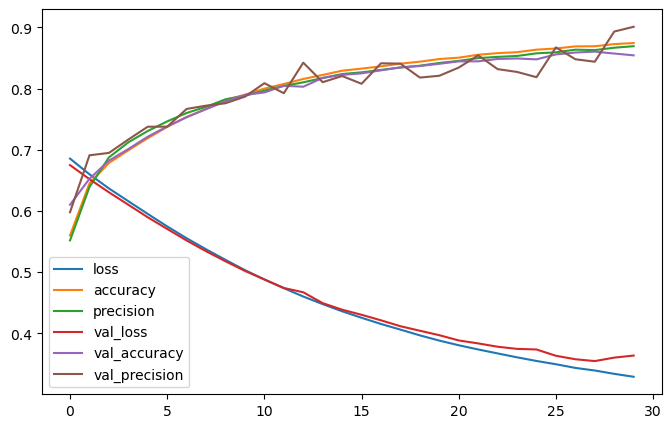

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [19]:
test_loss, test_acc, test_prec = model.evaluate(X_test, y_test, )
test_loss, test_acc, test_prec

 51/391 [==>...........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8493 - precision: 0.8856

2023-03-20 21:46:43.956533: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 977100000 exceeds 10% of free system memory.


391/391 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.8448 - precision: 0.8909


(0.3791216313838959, 0.8447999954223633, 0.8909355998039246)